# Data Science Coding Template

## 1. Create and Load Data

In [6]:
import pandas as pd
import numpy as np
import datetime

In [7]:
def get_today_date():
    return datetime.date.today().strftime('%Y%m%d')

# Example usage
today = get_today_date()
print(f"Today's date is: {today}")

Today's date is: 20250227


In [8]:
# Create a sample dataset
# data = {
#     "Customer_ID": [1001, 1002, 1003, 1004, 1005],
#     "Customer_Age": [25, 40, 35, 50, 29],
#     "Pet_Type": ["Dog", "Cat", "Dog", "Cat", "Dog"],
#     "Pet_Age": [3, 2, 7, 4, 1],
#     "Breed": ["Labrador", "Siamese", "Bulldog", "Persian", "Beagle"],
#     "Policy_Type": ["Comprehensive", "Basic", "Comprehensive", "Basic", "Premium"],
#     "Policy_Price": [250, 150, 300, 180, 350],
#     "Claims_Made": [1, 0, 2, 1, 3],
#     "Claim_Amount": [500, 0, 1200, 600, 2000],
#     "Renewed": ["Yes", "No", "Yes", "No", "Yes"]
# }

# # Convert to DataFrame
# df = pd.DataFrame(data)

# # download to data folder
# file_path = r'C:/Users/CHONGJR/Documents/Python_Coding/data/' 
# file_name = f'pet_insurance_sample_{today}.csv'
# df.to_csv(file_path+file_name, index=False)

In [9]:
# Load data from csv file
file_path = r'C:/Users/CHONGJR/Documents/Python_Coding/data/' 
# file_name = f'pet_insurance_sample_{today}.csv'
file_name = f'pet_insurance_sample_20250226.csv'
df = pd.read_csv(file_path+file_name) # skiprows, nrows, header=None if no headers
# pd.read_excel(file_path+file_name, sheet_name='Sheet1')
df


,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Breed,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date
0,100000,1001,25.0,Dog,3,Labrador,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,20/01/2025,NaN
1,100001,1002,40.0,Cat,2,Siamese.,NaN,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaN,NaN
2,100002,1003,35.0,Dog,7,Bulldog,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,30/05/2023,NaN
3,100003,1004,50.0,Cat,4,Persian,Basic,04/01/2022,04/01/2023,97.61,61.62,1,600.0,Approved,NaN,03/03/2024,NaN
4,100004,1005,29.0,Dog,1,beagle,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,06/07/2020,NaN
5,100005,1010,40.0,Dog,2,Golden Retriever,Basic,06/01/2022,06/01/2023,77.47,483.40,1,NaN,Rejected,Yes,08/11/2024,NaN
6,100009,1020,NaN,Dog,3,Siamese,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,04/04/2023,NaN
7,100010,1030,30.0,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,01/02/2025,NaN
8,100010,1030,30.0,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,01/02/2025,NaN


In [10]:
# Inspect the data
df.shape # show shape of dataframe
df.head() # show first 5 rows
print(df.dtypes) # show data type of each column

Policy_ID              int64
Customer_ID            int64
Customer_Age         float64
Pet_Type              object
Pet_Age                int64
Breed                 object
Policy_Type           object
Policy_Start_Date     object
Policy_End_Date       object
Premium_Amount       float64
Excess_Amount        float64
Claims_Made            int64
Claim_Amount         float64
Claim_Status          object
Renewed               object
Last_Claim_Date       object
Join_Date            float64
dtype: object


## 2. Data Cleanup & Preprocessing


In [11]:
# Identifying null values variable
isnull = df.isnull()

# Counting null values by Column
isnull_count = isnull.sum()
print("Number of Nulls:", isnull_count)

# Total Nulls in Dataset
Total_isnull_count = isnull.sum().sum()
print("Total Nulls:", isnull.sum().sum())

Number of Nulls: Policy_ID            0
Customer_ID          0
Customer_Age         1
Pet_Type             0
Pet_Age              0
Breed                0
Policy_Type          1
Policy_Start_Date    0
Policy_End_Date      0
Premium_Amount       0
Excess_Amount        0
Claims_Made          0
Claim_Amount         1
Claim_Status         0
Renewed              1
Last_Claim_Date      1
Join_Date            9
dtype: int64
Total Nulls: 14


In [12]:
# Handling missing values
# axis 0 for rows, axis 1 for columns

df_dropna = df.dropna(axis = 1)  # Remove columns with missing values
df_dropna = df.dropna()  # Remove rows with missing values (missing in any column)
df_dropna

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Breed,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date


In [13]:
df['Customer_Age'] = df['Customer_Age'].fillna(df.Customer_Age.mean())  # Fill missing values in column 'Customer_Age' with column mean
df['Claim_Amount'] = df['Claim_Amount'].fillna(0)  # Fill missing values in column 'Claim_Amount' with 0
df['Policy_Type'] = df['Policy_Type'].fillna('Unknown') # Fill missing values in column 'Policy Type' with 'Unknown'

df['Renewed_ff'] = df['Renewed'].fillna(method='ffill') # Forward Filling
df['Renewed_bf'] = df['Renewed'].fillna(method='bfill') # Backward Filling
df

C:\Users\CHONGJR\AppData\Local\Temp\ipykernel_30328\2503817536.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Renewed_ff'] = df['Renewed'].fillna(method='ffill') # Forward Filling
C:\Users\CHONGJR\AppData\Local\Temp\ipykernel_30328\2503817536.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Renewed_bf'] = df['Renewed'].fillna(method='bfill') # Backward Filling


,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Breed,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf
0,100000,1001,25.000,Dog,3,Labrador,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,20/01/2025,NaN,Yes,Yes
1,100001,1002,40.000,Cat,2,Siamese.,Unknown,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaN,NaN,No,No
2,100002,1003,35.000,Dog,7,Bulldog,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,30/05/2023,NaN,Yes,Yes
3,100003,1004,50.000,Cat,4,Persian,Basic,04/01/2022,04/01/2023,97.61,61.62,1,600.0,Approved,NaN,03/03/2024,NaN,Yes,No
4,100004,1005,29.000,Dog,1,beagle,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,06/07/2020,NaN,No,No
5,100005,1010,40.000,Dog,2,Golden Retriever,Basic,06/01/2022,06/01/2023,77.47,483.40,1,0.0,Rejected,Yes,08/11/2024,NaN,Yes,Yes
6,100009,1020,34.875,Dog,3,Siamese,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,04/04/2023,NaN,Yes,Yes
7,100010,1030,30.000,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,01/02/2025,NaN,Yes,Yes
8,100010,1030,30.000,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,01/02/2025,NaN,Yes,Yes


In [ ]:
# Convert data types
df['Last_Claim_Date'] = pd.to_datetime(df['Last_Claim_Date']) # convert date to datetime
# df['Last_Claim_Date'] = df['Last_Claim_Date'].dt.strftime('%Y-%m-%d') # convert to string

df['Renewed'] = df['Renewed'].astype('category') # convert to category
df['Customer_Age'] = df['Customer_Age'].astype(int) # convert to integer
df['Claims_Made'] = df['Claims_Made'].astype(int) # convert to integer
df.dtypes

C:\Users\CHONGJR\AppData\Local\Temp\ipykernel_30328\1028214346.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last_Claim_Date'] = pd.to_datetime(df['Last_Claim_Date']) # convert date to datetime


Policy_ID                     int64
Customer_ID                   int64
Customer_Age                  int32
Pet_Type                     object
Pet_Age                       int64
Breed                        object
Policy_Type                  object
Policy_Start_Date            object
Policy_End_Date              object
Premium_Amount              float64
Excess_Amount               float64
Claims_Made                   int32
Claim_Amount                float64
Claim_Status                 object
Renewed                    category
Last_Claim_Date      datetime64[ns]
Join_Date                   float64
Renewed_ff                   object
Renewed_bf                   object
dtype: object

In [15]:
# Check our work and ensure there are no more null values
df.isnull().sum()
df[df['Last_Claim_Date'].isnull() & df['Claims_Made']>0].count()

Policy_ID            0
Customer_ID          0
Customer_Age         0
Pet_Type             0
Pet_Age              0
Breed                0
Policy_Type          0
Policy_Start_Date    0
Policy_End_Date      0
Premium_Amount       0
Excess_Amount        0
Claims_Made          0
Claim_Amount         0
Claim_Status         0
Renewed              0
Last_Claim_Date      0
Join_Date            0
Renewed_ff           0
Renewed_bf           0
dtype: int64

In [16]:
# Categorical operations
df['Breed_Clean'] = df['Breed'].str.strip().str.title() # remove whitespace, convert to title case
df['Breed_Clean'] = df['Breed_Clean'].str.replace(" ", "_") # replace spaces with underscores
df['Breed_Clean'] = df['Breed_Clean'].str.strip('.') # remove '.' characters
df

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Breed,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed_Clean
0,100000,1001,25,Dog,3,Labrador,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador
1,100001,1002,40,Cat,2,Siamese.,Unknown,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaT,NaN,No,No,Siamese
2,100002,1003,35,Dog,7,Bulldog,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog
3,100003,1004,50,Cat,4,Persian,Basic,04/01/2022,04/01/2023,97.61,61.62,1,600.0,Approved,NaN,2024-03-03,NaN,Yes,No,Persian
4,100004,1005,29,Dog,1,beagle,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,2020-07-06,NaN,No,No,Beagle
5,100005,1010,40,Dog,2,Golden Retriever,Basic,06/01/2022,06/01/2023,77.47,483.40,1,0.0,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever
6,100009,1020,34,Dog,3,Siamese,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese
7,100010,1030,30,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog
8,100010,1030,30,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog


In [17]:
# Identify duplicate rows
print(df.duplicated())

# Remove duplicates
df = df.drop_duplicates()
num_duplicates = df.duplicated().sum() # count duplicates
print(num_duplicates)
df

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
dtype: bool
0


,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Breed,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed_Clean
0,100000,1001,25,Dog,3,Labrador,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador
1,100001,1002,40,Cat,2,Siamese.,Unknown,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaT,NaN,No,No,Siamese
2,100002,1003,35,Dog,7,Bulldog,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog
3,100003,1004,50,Cat,4,Persian,Basic,04/01/2022,04/01/2023,97.61,61.62,1,600.0,Approved,NaN,2024-03-03,NaN,Yes,No,Persian
4,100004,1005,29,Dog,1,beagle,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,2020-07-06,NaN,No,No,Beagle
5,100005,1010,40,Dog,2,Golden Retriever,Basic,06/01/2022,06/01/2023,77.47,483.40,1,0.0,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever
6,100009,1020,34,Dog,3,Siamese,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese
7,100010,1030,30,Dog,3,Bulldog,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog


In [18]:
# drop columns or rows
df=df.drop(['Breed'], axis=1) # drop columns
df=df.drop([3], axis=0) #drop rows
df

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed_Clean
0,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaT,NaN,No,No,Siamese
2,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog
4,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,2020-07-06,NaN,No,No,Beagle
5,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,1,0.0,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever
6,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese
7,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog


In [19]:
# keep columns
df_customer=df[['Customer_ID','Customer_Age']]
df_customer

,Customer_ID,Customer_Age
0,1001,25
1,1002,40
2,1003,35
4,1005,29
5,1010,40
6,1020,34
7,1030,30


In [20]:
# rename columns
df = df.rename(columns={'Breed_Clean': 'Breed'}) # rename column

# reindexed = df.rename(index={0: 10, '1': 'secondEntry'}) #rename index
reindexed = df.set_index("Customer_ID").rename_axis(None) # change index to Customer_ID
reindexed = df.rename_axis("Customer_ID", axis=1) # rename index column name
reindexed 

Customer_ID,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed
0,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaT,NaN,No,No,Siamese
2,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog
4,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,2020-07-06,NaN,No,No,Beagle
5,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,1,0.0,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever
6,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese
7,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog


## 3. SQL-style Operations in Pandas

In [21]:
# Slicing
sliced_df = df.iloc[1:4, 0:2]
print("Sliced DataFrame:")
print(sliced_df)
# 'iloc' is a positional selection method, loc is a label based selection method

# Filtering
filtered_df = df[df['Claims_Made'] >= 2]
print("\nFiltered DataFrame:")
print(filtered_df)

Sliced DataFrame:
   Policy_ID  Customer_ID
1     100001         1002
2     100002         1003
4     100004         1005

Filtered DataFrame:
   Policy_ID  Customer_ID  Customer_Age Pet_Type  Pet_Age    Policy_Type  \
2     100002         1003            35      Dog        7  Comprehensive   
4     100004         1005            29      Dog        1        Premium   
6     100009         1020            34      Dog        3          Basic   
7     100010         1030            30      Dog        3          Basic   

  Policy_Start_Date Policy_End_Date  Premium_Amount  Excess_Amount  \
2        03/01/2022      03/01/2023           88.44          80.68   
4        05/01/2022      05/01/2023           97.20         110.82   
6        07/01/2022      07/01/2023           21.71         297.29   
7        08/01/2022      08/01/2023           78.24         484.62   

   Claims_Made  Claim_Amount Claim_Status Renewed Last_Claim_Date  Join_Date  \
2            2        1200.0     No Claim    

In [22]:
# Pivot the DataFrame
pivot_df = df.pivot(index=['Breed','Pet_Age'], columns='Pet_Type', values='Claims_Made')
print(pivot_df)

# Pivoting the DataFrame using pivot_table for aggregation
pivot_table_df = df.pivot_table(index=['Breed','Pet_Age'], columns='Pet_Type', values='Claims_Made', aggfunc='sum')
print(pivot_table_df)

Pet_Type                  Cat  Dog
Breed            Pet_Age          
Beagle           1        NaN  3.0
Bulldog          3        NaN  2.0
                 7        NaN  2.0
Golden_Retriever 2        NaN  1.0
Labrador         3        NaN  1.0
Siamese          2        0.0  NaN
                 3        NaN  7.0
Pet_Type                  Cat  Dog
Breed            Pet_Age          
Beagle           1        NaN  3.0
Bulldog          3        NaN  2.0
                 7        NaN  2.0
Golden_Retriever 2        NaN  1.0
Labrador         3        NaN  1.0
Siamese          2        0.0  NaN
                 3        NaN  7.0


In [23]:
# Sorting
# df=df.sort_values(by='Claim_Amount', ascending=False) # Sort by Claim_Amount in descending order
df=df.sort_values(by=['Pet_Age','Claim_Amount'], ascending=[True,False]) # Sort by Pet_Age in ascending order and Claim_Amount in descending order
df

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,Claims_Made,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed
4,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,3,2000.0,No Claim,No,2020-07-06,NaN,No,No,Beagle
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,0,0.0,No Claim,No,NaT,NaN,No,No,Siamese
5,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,1,0.0,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever
7,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog
6,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,7,600.0,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese
0,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,1,500.0,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador
2,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,2,1200.0,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog


In [24]:
# Merging (left, right, inner, outer)
df1=df[:]
df2=df[df['Claim_Status']=='Approved']

left_merge = df1.merge(df2, on='Policy_ID', how='left', suffixes=('_1', '_2')) # Perform a left merge aligning on 'key' column
left_merge


,Policy_ID,Customer_ID_1,Customer_Age_1,Pet_Type_1,Pet_Age_1,Policy_Type_1,Policy_Start_Date_1,Policy_End_Date_1,Premium_Amount_1,Excess_Amount_1,...,Excess_Amount_2,Claims_Made_2,Claim_Amount_2,Claim_Status_2,Renewed_2,Last_Claim_Date_2,Join_Date_2,Renewed_ff_2,Renewed_bf_2,Breed_2
0,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,...,484.62,2.0,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog
4,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [25]:
inner_merge = df1.merge(df2, left_on='Policy_ID', right_on='Policy_ID', how='inner') # Perform an inner merge on 'key' and 'another_key' columns
inner_merge

,Policy_ID,Customer_ID_x,Customer_Age_x,Pet_Type_x,Pet_Age_x,Policy_Type_x,Policy_Start_Date_x,Policy_End_Date_x,Premium_Amount_x,Excess_Amount_x,...,Excess_Amount_y,Claims_Made_y,Claim_Amount_y,Claim_Status_y,Renewed_y,Last_Claim_Date_y,Join_Date_y,Renewed_ff_y,Renewed_bf_y,Breed_y
0,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,...,484.62,2,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog



## 4. Data Summarization & Exploration


In [26]:
# Basic statistics
df.describe()
df.info()
df['Breed'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 4 to 2
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Policy_ID          7 non-null      int64         
 1   Customer_ID        7 non-null      int64         
 2   Customer_Age       7 non-null      int32         
 3   Pet_Type           7 non-null      object        
 4   Pet_Age            7 non-null      int64         
 5   Policy_Type        7 non-null      object        
 6   Policy_Start_Date  7 non-null      object        
 7   Policy_End_Date    7 non-null      object        
 8   Premium_Amount     7 non-null      float64       
 9   Excess_Amount      7 non-null      float64       
 10  Claims_Made        7 non-null      int32         
 11  Claim_Amount       7 non-null      float64       
 12  Claim_Status       7 non-null      object        
 13  Renewed            7 non-null      category      
 14  Last_Claim_Date    

Breed
Siamese             2
Bulldog             2
Beagle              1
Golden_Retriever    1
Labrador            1
Name: count, dtype: int64

In [27]:
# Grouped statistics
df.groupby('Breed')['Claims_Made'].sum()
df.groupby(['Breed','Pet_Age']).agg({'Policy_ID': ['count'],
                                    'Customer_ID': ['nunique','count'],
                                    'Claims_Made': ['mean', 'median', 'sum'],
                                    'Claim_Amount': ['std', 'min', 'max']})


Policy_ID Customer_ID       Claims_Made             \
                             count     nunique count        mean median sum   
Breed            Pet_Age                                                      
Beagle           1               1           1     1         3.0    3.0   3   
Bulldog          3               1           1     1         2.0    2.0   2   
                 7               1           1     1         2.0    2.0   2   
Golden_Retriever 2               1           1     1         1.0    1.0   1   
Labrador         3               1           1     1         1.0    1.0   1   
Siamese          2               1           1     1         0.0    0.0   0   
                 3               1           1     1         7.0    7.0   7   

                         Claim_Amount                  
                                  std     min     max  
Breed            Pet_Age                               
Beagle           1                NaN  2000.0  2000.0  
Bulldog          3                NaN   700.0   700.0  
                 7                NaN  1200.0  1200.0  
Golden_Retriever 2                NaN     0.0     0.0  
Labrador         3                NaN   500.0   500.0  
Siamese          2                NaN     0.0     0.0  
                 3                NaN   600.0   600.0

In [ ]:
most_popular_breed = df['Breed'].value_counts().idxmax()
most_popular_breed_count = df['Breed'].value_counts().max()
third_most_purchased = df['Breed'].value_counts().index[2]
print(f"\nMost Popular Breed: {most_popular_breed} \nMost Popular Breed Count: {most_popular_breed_count} \n3rd Most Purchased Breed: {third_most_purchased}")

array([[<Axes: title={'center': 'Claim_Amount'}>]], dtype=object)

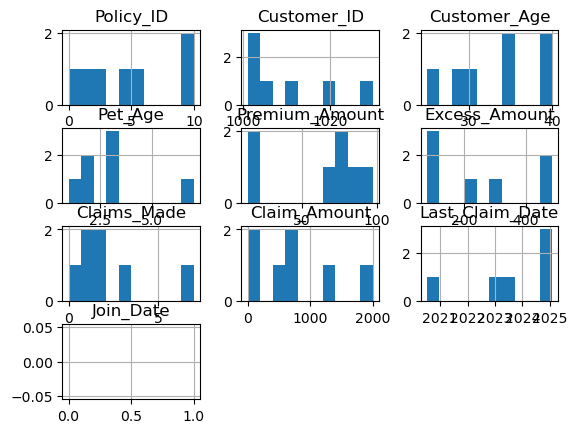

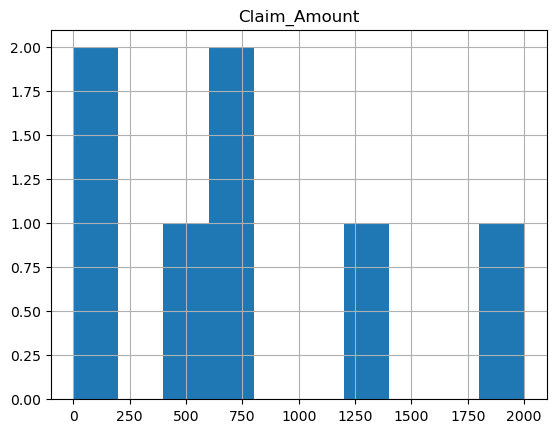

In [28]:
# Distribution
df.hist()
df.hist(column='Claim_Amount') # histogram for claim_amount by breed 

## 5. Feature Engineering

In [29]:
# Metrics
# Create a new column for claim ratio (claim amount / premium amount)
df['Claim_Ratio'] = df['Claim_Amount']/df['Premium_Amount']
df['Claim_Ratio'] = df['Claim_Ratio'].fillna(0)  # Replace NaN with 0

overall_claim_ratio = df['Claim_Amount'].sum()/df['Premium_Amount'].sum()
print(df.head())
print("Overall Ratio: ", overall_claim_ratio)

   Policy_ID  Customer_ID  Customer_Age Pet_Type  Pet_Age Policy_Type  \
4     100004         1005            29      Dog        1     Premium   
1     100001         1002            40      Cat        2     Unknown   
5     100005         1010            40      Dog        2       Basic   
7     100010         1030            30      Dog        3       Basic   
6     100009         1020            34      Dog        3       Basic   

  Policy_Start_Date Policy_End_Date  Premium_Amount  Excess_Amount  \
4        05/01/2022      05/01/2023           97.20         110.82   
1        02/01/2022      02/01/2023           14.12         215.39   
5        06/01/2022      06/01/2023           77.47         483.40   
7        08/01/2022      08/01/2023           78.24         484.62   
6        07/01/2022      07/01/2023           21.71         297.29   

   Claims_Made  Claim_Amount Claim_Status Renewed Last_Claim_Date  Join_Date  \
4            3        2000.0     No Claim      No      2020-

In [30]:
# Create new column based on conditions
df['Payout1'] = np.where(df['Claim_Status'] == 'Approved', df['Claim_Amount'], 0)
df

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,...,Claim_Amount,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed,Claim_Ratio,Payout1
4,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,...,2000.0,No Claim,No,2020-07-06,NaN,No,No,Beagle,20.576132,0.0
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,...,0.0,No Claim,No,NaT,NaN,No,No,Siamese,0.000000,0.0
5,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,...,0.0,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever,0.000000,0.0
7,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,...,700.0,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog,8.946830,700.0
6,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,...,600.0,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese,27.637034,0.0
0,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,...,500.0,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador,7.589557,0.0
2,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,...,1200.0,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog,13.568521,0.0


In [31]:
# Binning
df['binned'] = pd.cut(df['Premium_Amount'], bins=3, labels=False)
df

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,...,Claim_Status,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed,Claim_Ratio,Payout1,binned
4,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,...,No Claim,No,2020-07-06,NaN,No,No,Beagle,20.576132,0.0,2
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,...,No Claim,No,NaT,NaN,No,No,Siamese,0.000000,0.0,0
5,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,...,Rejected,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever,0.000000,0.0,2
7,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,...,Approved,Yes,2025-02-01,NaN,Yes,Yes,Bulldog,8.946830,700.0,2
6,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,...,Rejected,Yes,2023-04-04,NaN,Yes,Yes,Siamese,27.637034,0.0,0
0,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,...,Pending,Yes,2025-01-20,NaN,Yes,Yes,Labrador,7.589557,0.0,1
2,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,...,No Claim,Yes,2023-05-30,NaN,Yes,Yes,Bulldog,13.568521,0.0,2


In [32]:
# Extracting text patterns
df['extracted'] = df['Breed'].str.extract(r'(dog)')
df

,Policy_ID,Customer_ID,Customer_Age,Pet_Type,Pet_Age,Policy_Type,Policy_Start_Date,Policy_End_Date,Premium_Amount,Excess_Amount,...,Renewed,Last_Claim_Date,Join_Date,Renewed_ff,Renewed_bf,Breed,Claim_Ratio,Payout1,binned,extracted
4,100004,1005,29,Dog,1,Premium,05/01/2022,05/01/2023,97.20,110.82,...,No,2020-07-06,NaN,No,No,Beagle,20.576132,0.0,2,NaN
1,100001,1002,40,Cat,2,Unknown,02/01/2022,02/01/2023,14.12,215.39,...,No,NaT,NaN,No,No,Siamese,0.000000,0.0,0,NaN
5,100005,1010,40,Dog,2,Basic,06/01/2022,06/01/2023,77.47,483.40,...,Yes,2024-11-08,NaN,Yes,Yes,Golden_Retriever,0.000000,0.0,2,NaN
7,100010,1030,30,Dog,3,Basic,08/01/2022,08/01/2023,78.24,484.62,...,Yes,2025-02-01,NaN,Yes,Yes,Bulldog,8.946830,700.0,2,dog
6,100009,1020,34,Dog,3,Basic,07/01/2022,07/01/2023,21.71,297.29,...,Yes,2023-04-04,NaN,Yes,Yes,Siamese,27.637034,0.0,0,NaN
0,100000,1001,25,Dog,3,Comprehensive,01/01/2022,01/01/2023,65.88,115.87,...,Yes,2025-01-20,NaN,Yes,Yes,Labrador,7.589557,0.0,1,NaN
2,100002,1003,35,Dog,7,Comprehensive,03/01/2022,03/01/2023,88.44,80.68,...,Yes,2023-05-30,NaN,Yes,Yes,Bulldog,13.568521,0.0,2,dog


## 6. Data Visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

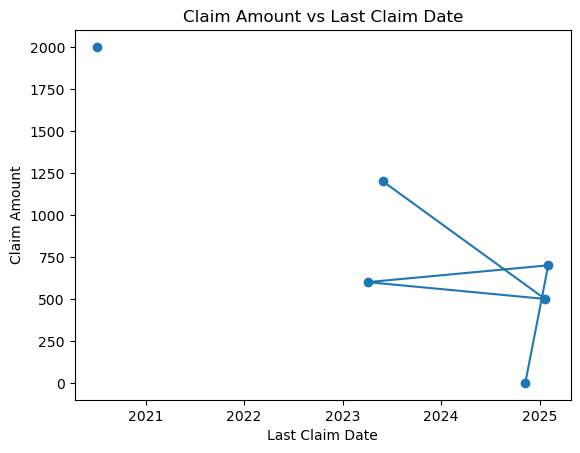

<Figure size 1000x500 with 0 Axes>

In [34]:
# using plt
plt.plot(df['Last_Claim_Date'], df['Claim_Amount'], marker='o') 
plt.xlabel('Last Claim Date')
plt.ylabel('Claim Amount')
plt.title('Claim Amount vs Last Claim Date')
plt.figure(figsize=(10,5))
plt.show()

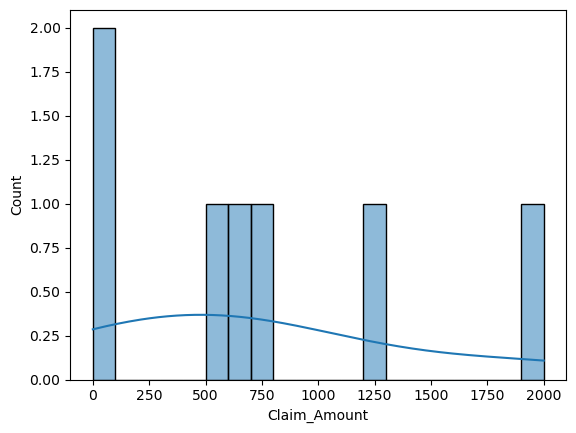

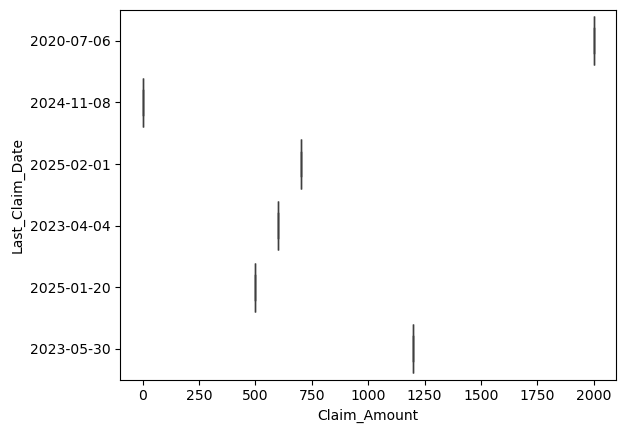

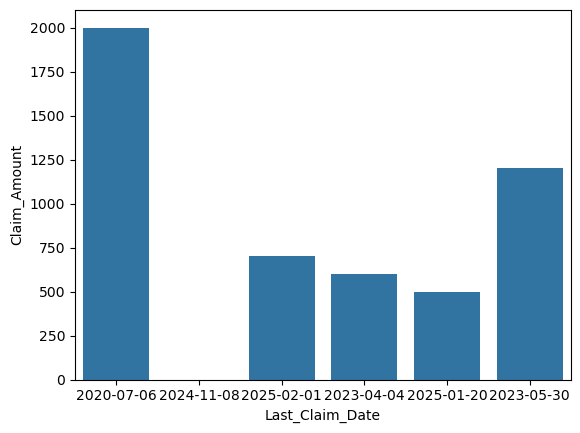

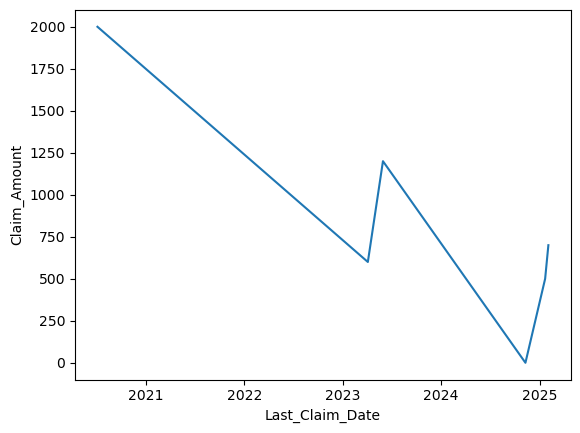

In [ ]:
# Histogram
sns.histplot(df['Claim_Amount'], kde=True, bins=20)
plt.show()

# Boxplot
sns.boxplot(x='Claim_Amount', y='Last_Claim_Date', data=df)
plt.show()

# Barplot
sns.barplot(x='Last_Claim_Date', y='Claim_Amount', data=df)
plt.show()

# Lineplot
sns.lineplot(x='Last_Claim_Date', y='Claim_Amount', data=df)
plt.show()

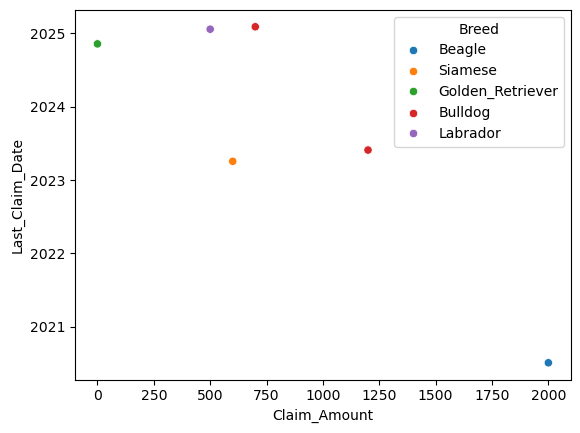

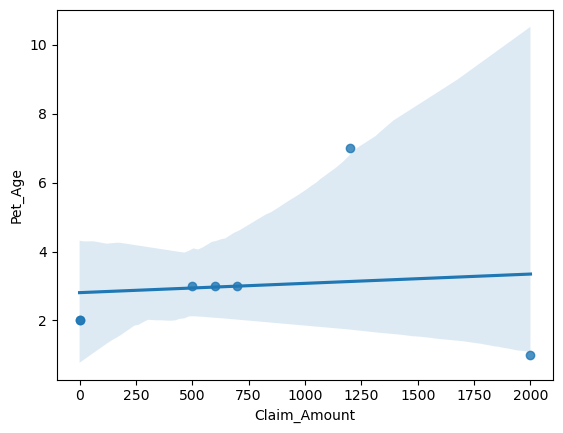

In [ ]:
# Scatterplot
sns.scatterplot(x='Claim_Amount', y='Last_Claim_Date', hue='Breed',data=df)
plt.show()

# Regression
sns.regplot(x='Claim_Amount', y='Pet_Age', data=df) 
plt.show()

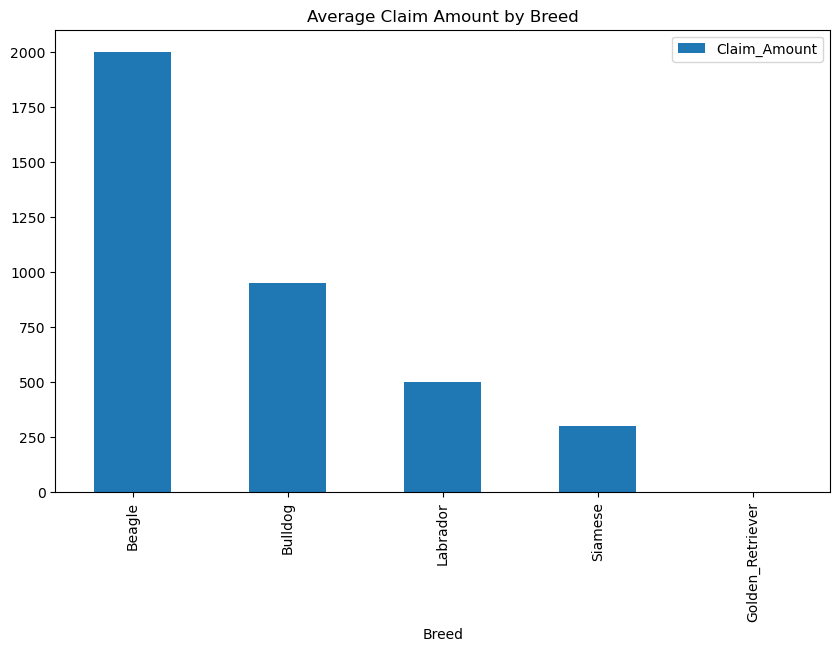

In [39]:
# Pivot Tables & Grouped Visualizations
df_pivot = df.pivot_table(index='Breed', values='Claim_Amount', aggfunc='mean')
# df_pivot
df_pivot.sort_values('Claim_Amount', ascending=False).head(10).plot(kind='bar', figsize=(10, 6), title='Average Claim Amount by Breed')
plt.show()

## 7. Statistical Analysis

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy import stats

from sklearn.ensemble import RandomForestClassifier


In [51]:
# Split data into training and test sets
# Predict claim amount based on premium amount and excess
X = df[['Premium_Amount', 'Excess_Amount']]
y = df['Claim_Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size between 0.0 and 1.0 = proportion of the dataset to include in the test split. 

In [47]:
# Linear Regression
# Initialize Linear Regression model
model = LinearRegression()

# Fit model to training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.0
R-squared Score: 0.0


In [61]:
# Logistic Regression
# Binary target: Has claims (1) or No claims (0)
df['Has_Claim'] = np.where(df['Claim_Status'] == 'Approved', 1, 0)

X = df[['Premium_Amount', 'Customer_Age', 'Pet_Age']]
y = df['Has_Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


In [62]:
# Random Forest Classification
# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 1.0


In [53]:
# T Test
# Compare claim amounts between two breeds (e.g., Siamese vs Persian)
Siamese = df[df['Breed'] == 'Siamese']['Claim_Amount']
Persian = df[df['Breed'] == 'Bulldog']['Claim_Amount']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(Siamese, Persian, nan_policy='omit')
print("T-Test Statistic:", t_stat)
print("P-value:", p_value)

T-Test Statistic: -1.6644794391276476
P-value: 0.23792650371128607


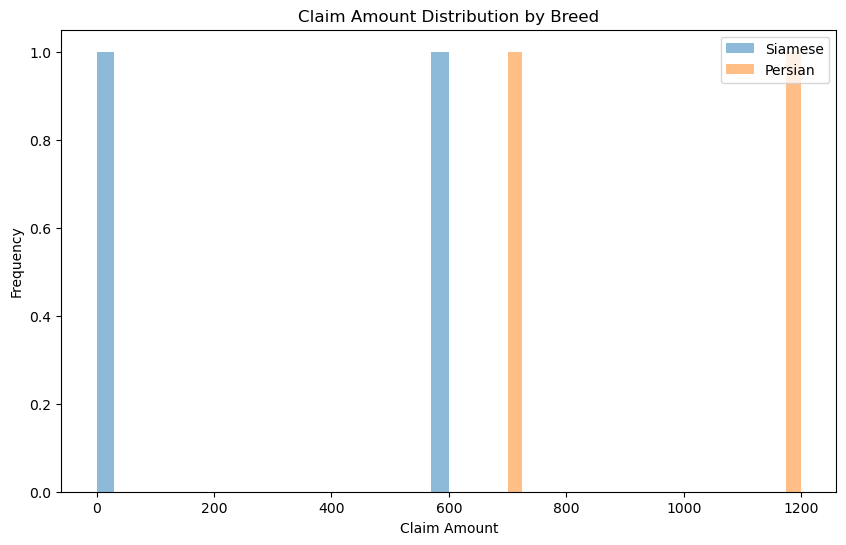

In [54]:
# Visualizing Claim Amount Distribution
plt.figure(figsize=(10, 6))
plt.hist(Siamese, alpha=0.5, label='Siamese', bins=20)
plt.hist(Persian, alpha=0.5, label='Persian', bins=20)
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.title('Claim Amount Distribution by Breed')
plt.legend()
plt.show()

In [55]:
### Chi-Square Test (Independence Test)
from scipy.stats import chi2_contingency

# Create contingency table for breed vs has_renewed
contingency_table = pd.crosstab(df['Breed'], df['Has_Renewed'])

# Perform Chi-Square Test
test_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {test_stat}, p-value: {p_value}")

# If p < 0.05, we reject the null hypothesis (significant difference between groups)


Chi-Square Test Statistic: 4.55, p-value: 0.336659875125563
